<a href="https://colab.research.google.com/github/Vinmsh25/AIML_/blob/main/lab_09_aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df1=pd.read_csv("loan_data.csv");
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
df1.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [16]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [17]:
print("Folllwing is a break up of credit approval status.\n1 means approved credit adn 0 means not approved")
print(df1['credit.policy'].value_counts())

Folllwing is a break up of credit approval status.
1 means approved credit adn 0 means not approved
1    7710
0    1868
Name: credit.policy, dtype: int64


Exploratory data analysis



Histogram of FICO score by credit approval status

Text(0.5, 0, 'FICO score')

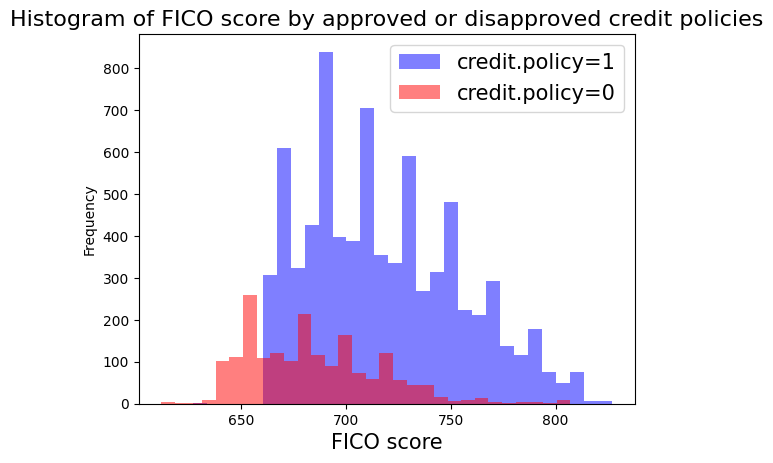

In [18]:
df1[df1['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='credit.policy=1')

df1[df1['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='credit.policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score by approved or disapproved credit policies",fontsize=16)
plt.xlabel("FICO score",fontsize=15)

Presence or absence of statistical diffrerence of various factors between credit approval status

Text(0, 0.5, 'Intrest rate')

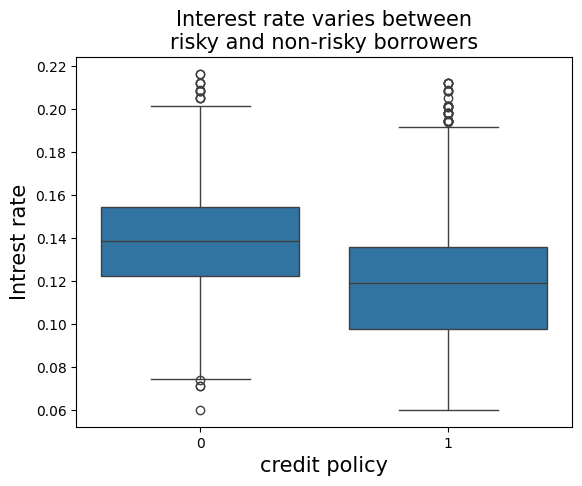

In [19]:
sns.boxplot(x=df1['credit.policy'],y=df1['int.rate'])
plt.title("Interest rate varies between\nrisky and non-risky borrowers",fontsize=15)
plt.xlabel("credit policy",fontsize=15)
plt.ylabel("Intrest rate",fontsize=15)

countplot of loans by purpose,with the color hue defined by not.fully.paid

Text(0.5, 0, 'purpose')

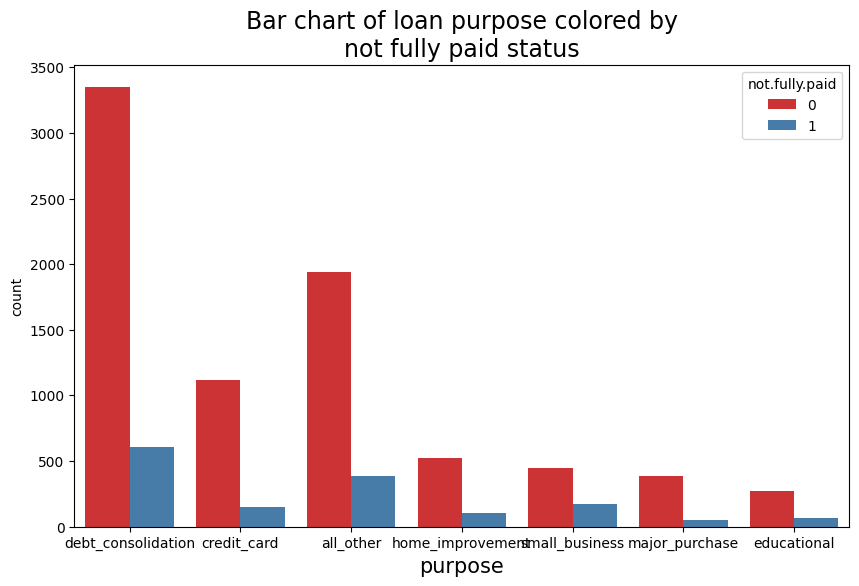

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df1,palette='Set1')
plt.title("Bar chart of loan purpose colored by\nnot fully paid status",fontsize=17)
plt.xlabel("purpose",fontsize=15)

Trend between FICO score and intrest rate

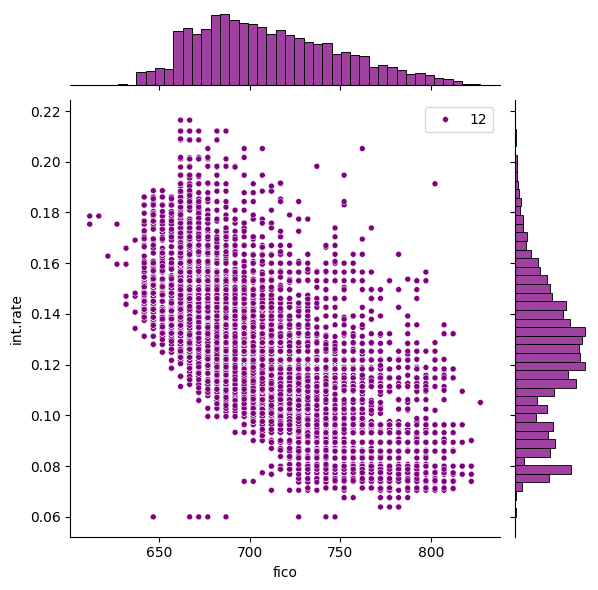

In [22]:
sns.jointplot(x='fico',y='int.rate',data=df1,color='purple',size=12)

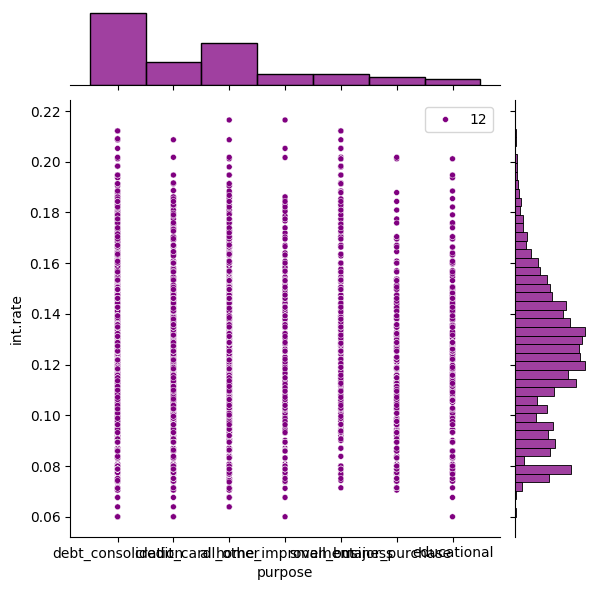

In [23]:
sns.jointplot(x='purpose',y='int.rate',data=df1,color='purple',size=12)

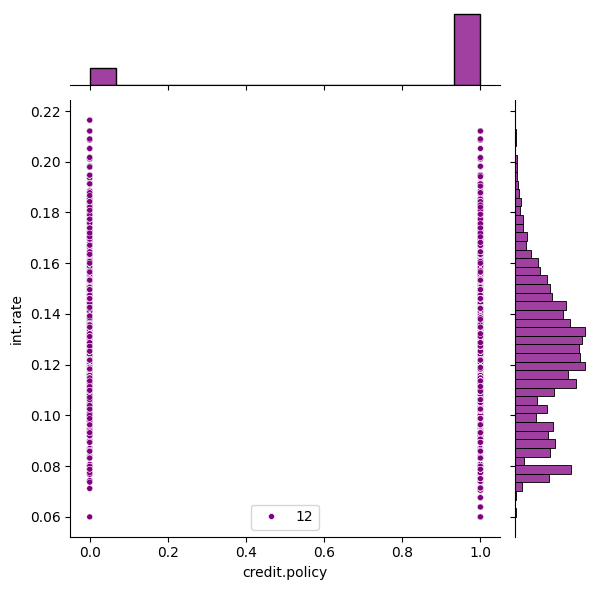

In [24]:
sns.jointplot(x='credit.policy',y='int.rate',data=df1,color='purple',size=12)

Implot to see if the trend differed between not.fully.paid and credit.polic

<Figure size 1400x700 with 0 Axes>

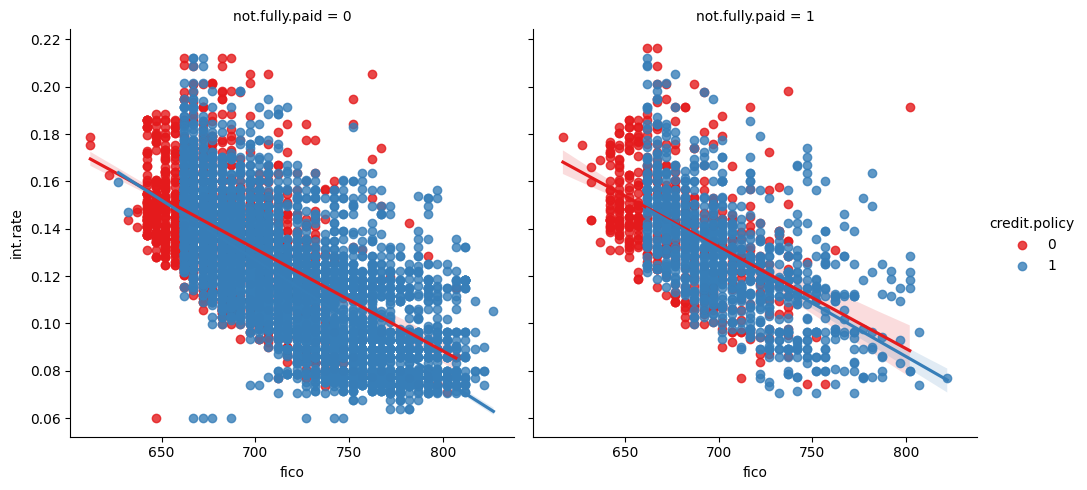

In [25]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df1,hue='credit.policy',col='not.fully.paid',palette='Set1')

Setting up the data

Categorical features

In [26]:
df_final=pd.get_dummies(df1,['purpose'],drop_first=True)

In [27]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Train test split

In [28]:
from sklearn.model_selection import train_test_split
x=df_final.drop('not.fully.paid',axis=1)
y=df_final['not.fully.paid']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [29]:
x_train.shape, y_test.shape

((6704, 18), (2874,))

Training a Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data

In [31]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=None)

In [32]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
predictions=dtree.predict(x_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2441
           1       0.19      0.24      0.21       433

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



In [37]:
cm = confusion_matrix(y_test,predictions)
print(cm)
print("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1993  448]
 [ 328  105]]
Accuracy of prediction: 0.73


Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier(n_estimators=600)

In [43]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

In [45]:
rfc_pred=rfc.predict(x_test)

result

In [46]:
cr=classification_report(y_test,rfc_pred)

In [47]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2441
           1       0.50      0.03      0.05       433

    accuracy                           0.85      2874
   macro avg       0.68      0.51      0.48      2874
weighted avg       0.80      0.85      0.79      2874

